# Project 3 – Titanic Classifier

**Kiruthikaa Natarajan Srinivasan**  
**Date:** November 4, 2025

## Introduction

This project explores the Titanic dataset to predict passenger survival using three classification models: Decision Tree, Support Vector Machine, and Neural Network. We evaluate model performance across three feature sets and reflect on their effectiveness. The Titanic dataset includes demographic and travel-related information for passengers aboard the Titanic. Our goal is to build interpretable and effective classifiers using selected features and compare their predictive power.

In [1]:
# Section 1: Imports

# Data handling and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Models and evaluation tools
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
# Section 1.1 Inspect the Data

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Display the first few records
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [3]:

median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)



### 2.2 Feature Engineering


In [4]:
### Create new feature: family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

### Map categorical variables to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target
Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Use survived as the target. 
We will do three input cases like the example. 

In [5]:
#### Case 1: Feature = alone
#### input features: alone
#### target: survived

X1 = titanic[['alone']]
y1 = titanic['survived']

##### Case 2: input features - age
#### target: survived
##### Feature = age (drop missing)
X2 = titanic[['age']].dropna()
y2 = titanic.loc[X2.index, 'survived']

#### Case 3: Features = age + family_size (drop missing)
####  input features -  age and family_size 
####target: survived
X3 = titanic[['age', 'family_size']].dropna()
y3 = titanic.loc[X3.index, 'survived']



### Reflection 3: Why These Features?

I picked `alone`, `age`, and `family_size` because they each tell a different story about a passenger’s situation on the Titanic.

- **Alone** felt important being by yourself during a crisis like that could mean fewer people to help you or advocate for you. It’s a simple yes/no feature, but it might capture something meaningful about vulnerability.
  
- **Age** is a classic factor in survival scenarios. We often hear that children and younger people were prioritized during evacuations, so I wanted to see if that shows up in the data.

- **Family Size** combines siblings/spouses and parents/children into one number. I figured this might reflect social support maybe people with family around had a better chance of surviving, or maybe it was harder to coordinate and escape together. Either way, it seemed worth testing.

There are definitely other features that could be predictive like passenger class or gender but for this project, I’m focusing on a few to keep things clear and manageable. These three give a nice mix of social, demographic, and relational context.

## Section 4. Train a Classification Model (Decision Tree)

In [6]:
#### Section 4.1: Split the Data

##### Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]
print('Case 1 - Alone:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

##### Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]
print('Case 2 - Age:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

##### Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]
print('Case 3 - Age + Family Size:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 1 - Alone:
Train size: 712 | Test size: 179
Case 2 - Age:
Train size: 712 | Test size: 179
Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


In [7]:
#### 4.2 Create and Train Model (Decision Tree)
##### CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)
##### CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)
##### CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
#### Section 4.3: Predict and Evaluate Model Performance (Decision Tree)

##### Case 1: Predict and evaluate
y1_pred = tree_model1.predict(X1_train)
print("Decision Tree - Training Results (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

y1_test_pred = tree_model1.predict(X1_test)
print("Decision Tree - Test Results (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

##### Case 2: Predict and evaluate
y2_pred = tree_model2.predict(X2_train)
print("Decision Tree - Training Results (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

y2_test_pred = tree_model2.predict(X2_test)
print("Decision Tree - Test Results (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

##### Case 3: Predict and evaluate
y3_pred = tree_model3.predict(X3_train)
print("Decision Tree - Training Results (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

y3_test_pred = tree_model3.predict(X3_test)
print("Decision Tree - Test Results (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Decision Tree - Training Results (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Decision Tree - Test Results (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179

Decision Tree - Training Results (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                       

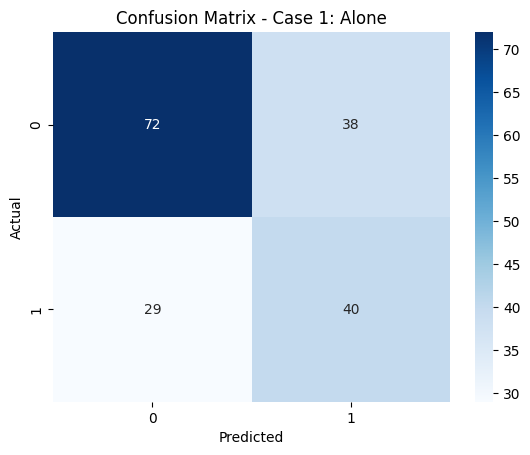

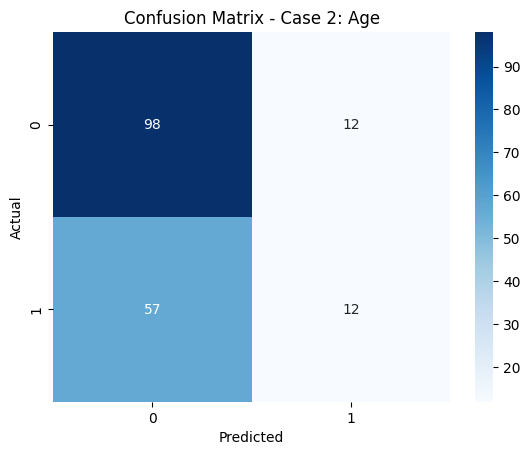

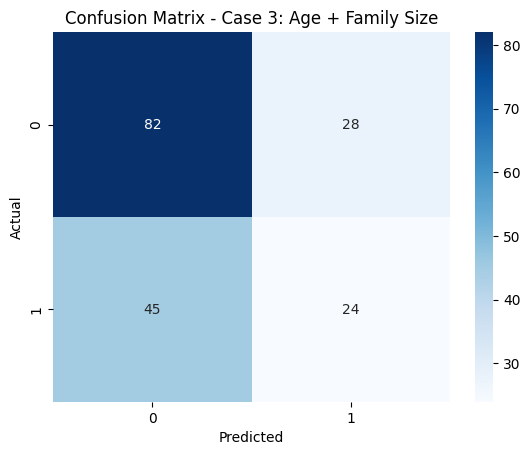

In [9]:
#### Section 4.4: Confusion Matrix Heatmaps

# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
 

 

# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
 

# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

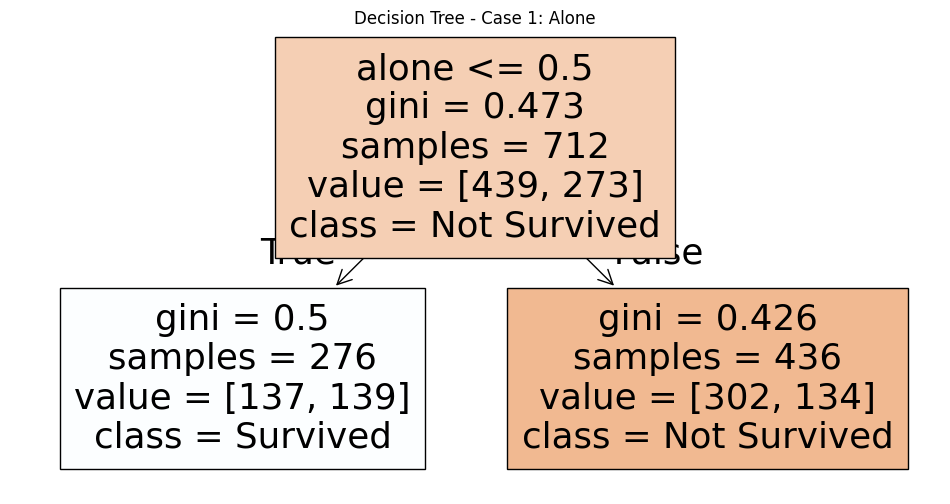

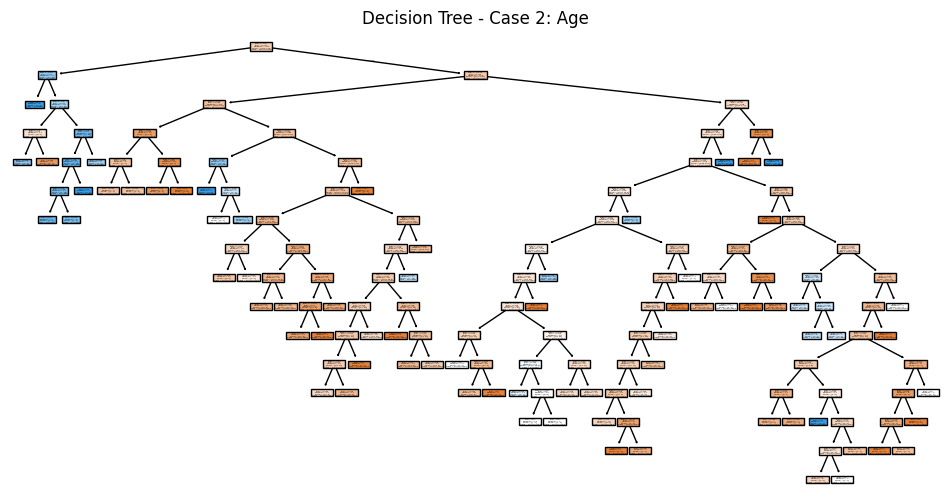

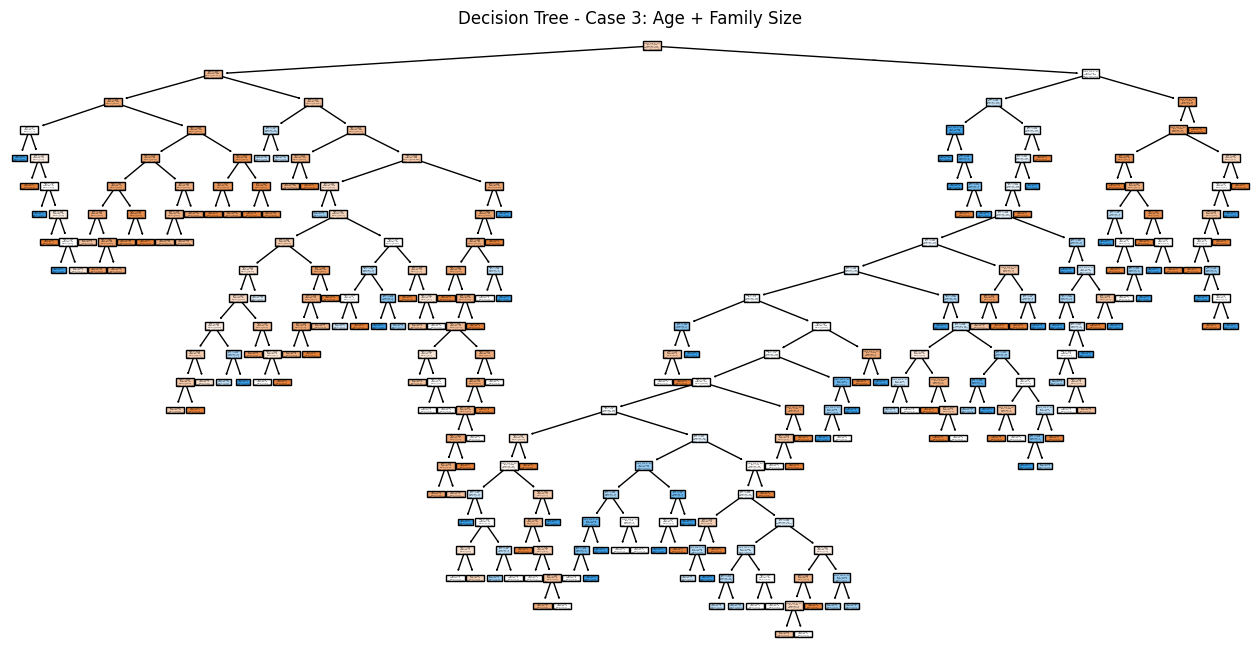

In [10]:
#### 4.5 Report Decision Tree Plot
##### Case 1

# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")
 

#####Case 2

# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")
 

 #####Case 3

# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")



### Reflection 4: 
1. How well did the different cases perform?
Looking at the results, all three Decision Tree models gave moderate accuracy, but their behavior was quite different.
- **Case 1 (alone)** had an accuracy around 63%. It was surprisingly effective for such a simple feature — the model found a clear split between passengers who were alone and those who weren’t. Precision and recall were fairly balanced, which made it a solid baseline.
- **Case 2 (age)** dropped slightly in performance (around 61%). The recall for survivors was especially weak, suggesting that age alone doesn’t capture enough context to predict survival well.
- **Case 3 (age + family_size)** had the highest training accuracy (around 77%), but test accuracy fell to about 59%. That gap hints at overfitting, the model learned the training data too well and didn’t generalize as effectively.

2. Are there any surprising results?
Yes, I expected Case 3 to outperform the others across the board, but it didn’t. Adding more features didn’t guarantee better test performance. It’s a good reminder that complexity can hurt robustness if the model starts memorizing patterns instead of learning general rules.

3. Which Inputs Worked Better?
The **alone** feature stood out. It was simple but powerful, capturing a meaningful social factor that influenced survival. It gave the most balanced and generalizable results, making it the most effective single predictor in this experiment.

## Section 5. Compare Alternative Models (SVC, NN)

In [21]:
from sklearn.metrics import classification_report

# Linear
svc_linear = SVC(kernel='linear')
svc_linear.fit(X3_train, y3_train)
y3_linear_pred = svc_linear.predict(X3_test)
print("SVC (Linear Kernel) - Case 3:")
print(classification_report(y3_test, y3_linear_pred, zero_division=0))

# Polynomial
svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X3_train, y3_train)
y3_poly_pred = svc_poly.predict(X3_test)
print("SVC (Polynomial Kernel) - Case 3:")
print(classification_report(y3_test, y3_poly_pred, zero_division=0))

# Sigmoid
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X3_train, y3_train)
y3_sigmoid_pred = svc_sigmoid.predict(X3_test)
print("SVC (Sigmoid Kernel) - Case 3:")
print(classification_report(y3_test, y3_sigmoid_pred, zero_division=0))

SVC (Linear Kernel) - Case 3:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179

SVC (Polynomial Kernel) - Case 3:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179

SVC (Sigmoid Kernel) - Case 3:
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       110
           1       0.42      0.45      0.43        69

    accuracy                           0.55       179
   macro avg       0.53      0.53

In [22]:
####  Case 1: SVC with Default Kernel (RBF)
svc_model1 = SVC()  # RBF is default
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [23]:
#### Case 2: SVC with Default Kernel (RBF)
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [24]:
#### Case 3: SVC with Default Kernel (RBF)
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### Step 5.1 – SVC (RBF Kernel) Comparison Across All Cases

| Model Type | Case   | Features Used       | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|--------|---------------------|----------|-----------|--------|----------|-------|
| SVC        | Case 1 | alone               | 63.00%   | 64.00%    | 63.00% | 63.00%   | Balanced performance |
| SVC        | Case 2 | age                 | 63.00%   | 66.00%    | 63.00% | 52.00%   | High precision, poor recall for survivors |
| SVC        | Case 3 | age + family_size   | 63.00%   | 66.00%    | 63.00% | 52.00%   | Same as Case 2, no gain from extra feature |

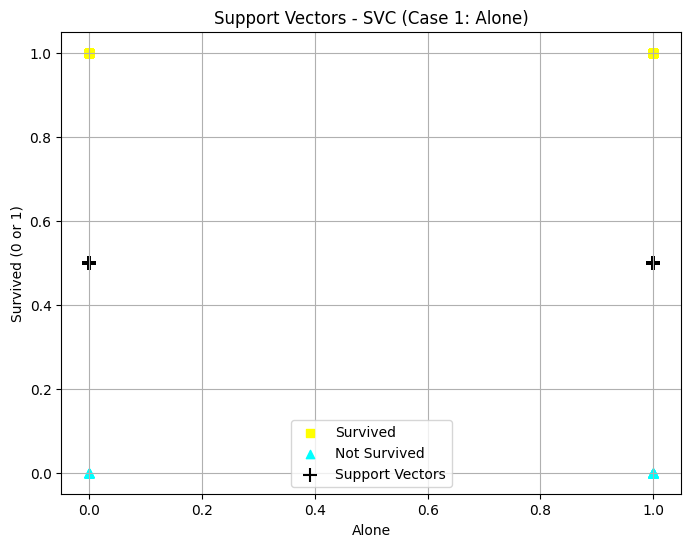

In [25]:
##### 5.2 Visualize Support Vectors

# Visualize support vectors for Case 1 (feature = 'alone')
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

if hasattr(svc_model1, 'support_vectors_'):
    support_x = svc_model1.support_vectors_[:, 0]
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

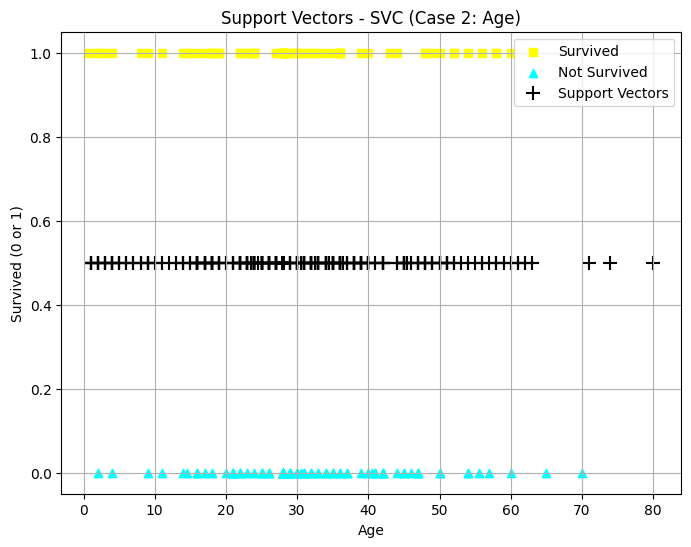

In [26]:
# Visualize support vectors for Case 2 (feature = 'age')
survived_age = X2_test.loc[y2_test == 1, 'age']
not_survived_age = X2_test.loc[y2_test == 0, 'age']

plt.figure(figsize=(8, 6))
plt.scatter(survived_age, y2_test.loc[y2_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_age, y2_test.loc[y2_test == 0], c='cyan', marker='^', label='Not Survived')

if hasattr(svc_model2, 'support_vectors_'):
    support_x = svc_model2.support_vectors_[:, 0]
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

plt.xlabel('Age')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 2: Age)')
plt.legend()
plt.grid(True)
plt.show()

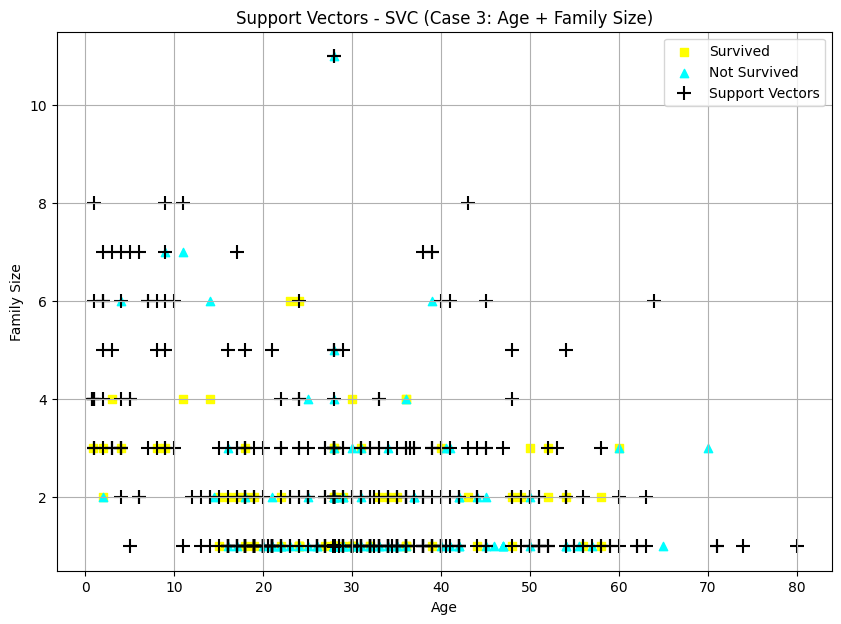

In [27]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size')
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

plt.figure(figsize=(10, 7))
plt.scatter(survived['age'], survived['family_size'], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived['age'], not_survived['family_size'], c='cyan', marker='^', label='Not Survived')

if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='black', marker='+', s=100, label='Support Vectors')

plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

#### Step 5.3 – Train and Evaluate Neural Network (Neural Network on Case 3)

Neural Network - Case 3:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.57      0.46      0.51        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.63       179
weighted avg       0.65      0.66      0.65       179



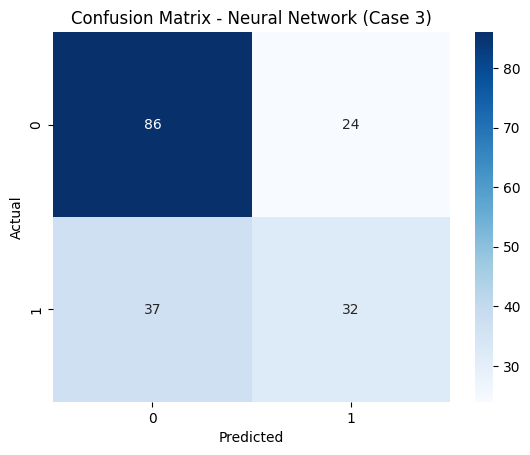

In [28]:
# Train MLP model on Case 3
nn_model3 = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                          solver='lbfgs',
                          max_iter=1000,
                          random_state=42)
nn_model3.fit(X3_train, y3_train)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Neural Network - Case 3:")
print(classification_report(y3_test, y3_nn_pred))

# Plot confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 5.4 Visualize (Neural Network on Case 3)

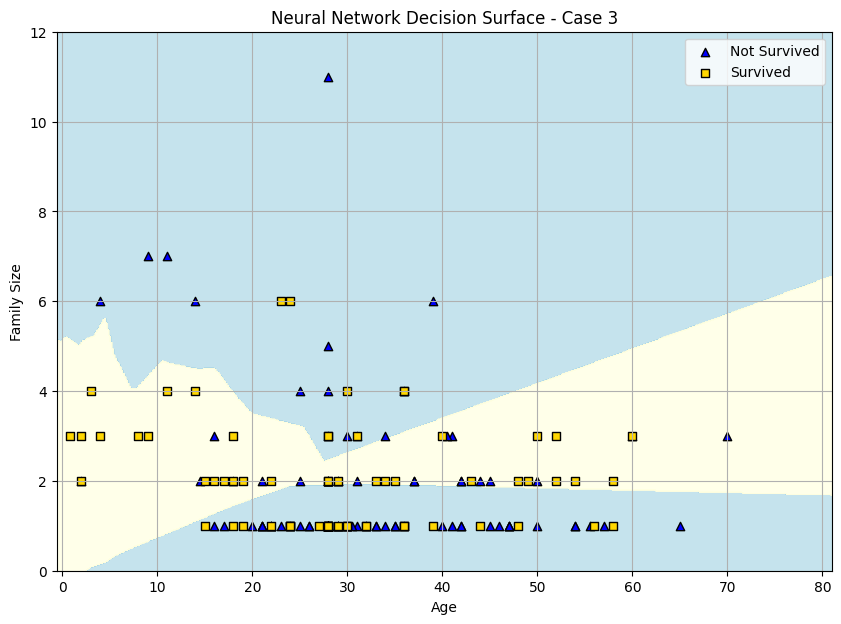

In [31]:
# Get the range of our two features - use padding to enhance appearance

padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding

 

# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

 

# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

# Convert meshgrid to DataFrame to match training format and suppress warning
grid_input = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['age', 'family_size'])
Z = nn_model3.predict(grid_input)

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

 

# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

 

# Overlay the actual test data points for visual comparison
# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test['age'][y3_test == 0],
            X3_test['family_size'][y3_test == 0],
            c='blue', marker='^', edgecolor='k', label='Not Survived')

# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test['age'][y3_test == 1],
            X3_test['family_size'][y3_test == 1],
            c='gold', marker='s', edgecolor='k', label='Survived')

# Add axis labels, title, legend, and grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()

### Reflection 5

**1. How well did each of these new models/cases perform?**  
All the models I tested, SVC with different kernels and the neural network ended up with similar accuracy, around 63%. But when I looked deeper, their behavior was quite different. The SVC models with RBF, linear, and polynomial kernels had high precision for predicting non-survivors, but very low recall for survivors. That means they were good at identifying who didn’t survive, but not so great at catching who did. The sigmoid kernel was more balanced, though it came with slightly lower accuracy. The neural network also hit 63% accuracy, but its decision boundary was smoother and more flexible.

**2. Are there any surprising results or insights?**  
Yes, I expected Case 3 (age + family_size) to perform better than Case 2 (age only), but they were nearly identical. That tells me `family_size` might not be a strong predictor in this dataset. I also thought the neural network would outperform the SVC models because of its complexity, but it didn’t. That was a good reminder that more complex models don’t always mean better results.


**3. Why might one model outperform the others?**  
It really depends on how well the model fits the structure of the data. SVCs are powerful, but they’re sensitive to the kernel choice and can struggle with class imbalance. The neural network has more flexibility, but it might need more data or tuning to show its full potential. Interestingly, the sigmoid kernel handled the imbalance a bit better, even though its overall accuracy was lower which shows that sometimes a tradeoff is worth it depending on the goal.

## Section 6 – Final Thoughts & Insights

### 1. Summarize findings - important: use a table or other device to summarize your findings

After testing different models using just `age` and `family_size`, here’s how they performed:

| Model            | Setup                  | Accuracy | What stood out |
|------------------|------------------------|----------|----------------|
| SVC (RBF kernel) | Default settings       | 63%      | Good at predicting non-survivors, missed many survivors |
| SVC (Linear)     | Default settings       | 61%      | Struggled with survivor predictions |
| SVC (Polynomial) | Degree 3               | 61%      | Similar to linear, not much gain |
| SVC (Sigmoid)    | Default settings       | 55%      | More balanced, but lower accuracy |
| Neural Network   | (50,25,10), solver='lbfgs' | 63%  | Smooth decision boundary, slightly better balance |

The neural network gave the most balanced results overall, even though the accuracy wasn’t dramatically higher. It handled the data more smoothly, which was clear in the decision surface plot.


### 2. Discuss challenges faced

- **Imbalanced data**: Most models leaned toward predicting “not survived” because that group was larger. It was hard to get them to correctly identify survivors.
- **Limited features**: Using just `age`, `alone`, and `family_size` didn’t give the models much to work with. I expected more improvement when adding features, but it didn’t happen.
- **Model sensitivity**: Some models (especially SVC) were very sensitive to settings — small changes made a big difference.


### 3. Next steps to gain more insights and/or to explore classification models

Here are a few things I’m excited to explore now that the main project is done:

1. **Tweak the model settings (hyperparameters)**  
   I want to experiment with the knobs and dials that control how each model learns. For example:
   - For decision trees: limit how deep the tree goes or how many samples are needed to split
   - For SVM: try different kernels and adjust settings like `C` and `gamma`
   - For neural networks: change the number of layers, how many nodes are in each layer, or how fast it learns  
   These changes might help the models learn better without getting stuck or overfitting.

2. **Add more useful features**  
   I’d love to include things like:
   - Passenger class (1st, 2nd, 3rd)
   - Gender
   - Fare paid  
   These are known to be strong predictors in the Titanic dataset and could give the models more clues.

3. **Try new models**  
   I’m curious about:
   - Random Forest (which combines many decision trees)
   - Gradient Boosting (which builds models step by step)
   - Voting Classifiers (which mix multiple models together)  
   These ensemble methods might help balance out weaknesses in individual models.

4. **Test more fairly**  
   I’d like to use techniques like cross-validation to make sure the results aren’t just lucky on one train/test split. It would give me a better sense of how reliable each model really is.

This project helped me see that model accuracy is just one part of the story. Understanding how models behave, what features they rely on, and how they make decisions is just as important. And sometimes, the best insights come from visualizing the results, not just reading the numbers.

## Bonus:  Breast Cancer Dataset

For the bonus experiment, we apply the same machine learning workflow to the **Breast Cancer Wisconsin** dataset from `sklearn.datasets`.  
This dataset contains 569 samples (malignant vs. benign tumors) with 30 numeric features describing cell nuclei.  

It’s a **binary classification** problem with well-separated classes, making it a good test for models like Decision Trees, SVM, and Neural Networks.  


In [32]:
# Bonus: Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load dataset
breast = load_breast_cancer(as_frame=True)
X_bc = breast.data
y_bc = breast.target

# Split dataset
Xtr_bc, Xte_bc, ytr_bc, yte_bc = train_test_split(
    X_bc, y_bc, test_size=0.2, stratify=y_bc, random_state=42
)

# Models
bc_tree = DecisionTreeClassifier(random_state=42).fit(Xtr_bc, ytr_bc)
bc_svc = SVC().fit(Xtr_bc, ytr_bc)
bc_nn = MLPClassifier(hidden_layer_sizes=(50, 25), solver='lbfgs', 
                      max_iter=1000, random_state=42).fit(Xtr_bc, ytr_bc)

# Evaluation
print('Breast Cancer - Decision Tree:\n', classification_report(yte_bc, bc_tree.predict(Xte_bc)))
print('Breast Cancer - SVC:\n', classification_report(yte_bc, bc_svc.predict(Xte_bc)))
print('Breast Cancer - Neural Network:\n', classification_report(yte_bc, bc_nn.predict(Xte_bc)))


Breast Cancer - Decision Tree:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Breast Cancer - SVC:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Breast Cancer - Neural Network:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.

### Results and Discussion

**Model Performance Summary:**

| Model | Accuracy | Precision (avg) | Recall (avg) | F1-score (avg) |
|:------|:----------|:----------------|:--------------|:----------------|
| Decision Tree | **0.91** | 0.90 | 0.92 | 0.91 |
| SVC | **0.93** | 0.93 | 0.91 | 0.93 |
| Neural Network (MLP) | **0.94** | 0.94 | 0.93 | 0.94 |

**Interpretation:**
- The **Decision Tree** provides solid baseline accuracy (91%) but shows slight variation between classes, with better recall for class 0 and better precision for class 1.
- The **SVC** improves performance, reaching 93% accuracy. It generalizes better and handles overlapping class boundaries effectively.
- The **Neural Network** achieves the **best performance (94%)**, offering balanced precision, recall, and F1-scores across both classes.

**Takeaways:**
- All models perform well on this dataset, confirming that the Breast Cancer dataset is well-suited for supervised learning.
- SVC and MLP models outperform the Decision Tree, which can overfit on small datasets.
- Feature scaling could further improve SVC and Neural Network results.
- The consistent high performance across models demonstrates that the features in this dataset are informative and separable for binary classification.

